#Lab Assignment - 2
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 03-03-2023    2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file.

In case you face any trouble with the submission, please contact the TA:

Shivam Kainth, 2020csz0006@iitrpr.ac.in



Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab2.ipynb

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab2 then you should name the colab file as: ABC_2022csx1234_lab2.ipynb


**This assignment will focus on the implementation of TD learning methods viz. the Q-learning and SARSA Algorithms on selected OpenAI Gym environments.**

**Template code is provided for reference/help and is optional to use**

## CliffWalking Environment


```


gym.make("CliffWalking-v0")
```



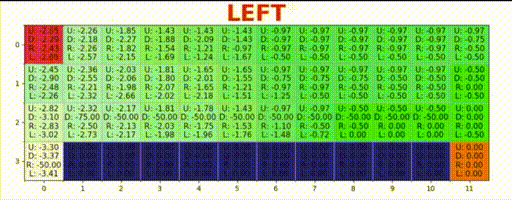

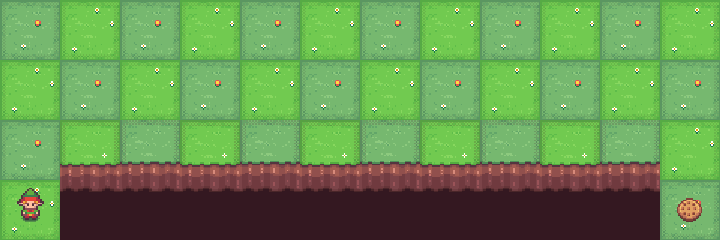

**Description**:


The board is a 4x12 matrix, with (using NumPy matrix indexing):

    [3, 0] as the start at bottom-left

    [3, 11] as the goal at bottom-right

    [3, 1..10] as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.

**Actions**

There are 4 discrete deterministic actions:

    0: move up

    1: move right

    2: move down

    3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.
    
    

# Imports

In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 11.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 80.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [ ]:
!pip3 install imageio==2.4.1

!pip install --upgrade imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=5b105eaec2794d71e58a4f2f47bf7b8233e156e1a955d872a91ca633143b8ac4
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 20.3 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import random
import cv2
import collections
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

In [ ]:
# def render():
#         color = (255, 100, 0)
#         pygame.display.flip()
#         view = pygame.surfarray.array3d(screen)
#         view = view.transpose([1, 0, 2])
#         img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
#         cv2_imshow(img_bgr)
#         time.sleep(0.5)
#         output.clear()


In [ ]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        return img_bgr

In [ ]:
def img_to_video(img_arr,path,fps):
  h,w,layers = img_arr[0].shape
  size = (w,h)
  out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
  for i in range(len(img_arr)):
    out.write(img_arr[i])
  out.release

In [ ]:
def img_to_vid_Q1(Q,path):
  env = gym.make('CliffWalking-v0',render_mode="human")
  curr_state = env.reset()[0]

  for i in range(1):
    steps = 0
    img = []
    while True:
      steps += 1
      action = np.argmax(Q[curr_state])
      next_state, r, temp, info, extra = env.step(action)
      img.append(render())

      state = next_state
      if(temp == True or steps >= 50):
        break
    (img_to_video(img,path,4))

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(9,6))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
# env = gym.make('CliffWalking-v0',render_mode="None")
# env.reset()

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='None' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


(36, {'prob': 1})

Taking 10 random steps in cliffwalking

In [ ]:
# for i in range(10):
#   next_state, reward, done,_,__= env.step(np.random.randint(0,4))
#   render()

# Question 1

In [ ]:
# function for plotting total reward vs episode
def plot_reward(r, alpha):
  m = len(r)
  x = np.arange(m)
  plt.title("Average Reward when alpha = " + str(alpha))
  plt.xlabel("Iteration Number")
  plt.ylabel("Reward")
  plt.plot(x, r)
  plt.show()

In [ ]:
# Q learning with random policy
def qLearningRandom(env, alpha):
  num_states = env.observation_space.n
  num_actions = env.action_space.n
  gamma = 0.99

  Q = np.zeros((num_states, num_actions)) # Q(s,a)
  policy = np.zeros(num_states)
  avg_reward = [] # average reward for each episode
  num_iterations = 0
  max_iterations = 1000
  max_steps = 100
  total_steps = 0 # to keep track of total number of steps over all episodes
  numOfTerminals = 0 # to keep track of how many episodes reach the terminal state

  while(num_iterations < max_iterations): # limiting number of episodes
    env.reset()
    curr_state = env.reset()[0]
    temp_action = [] # stores action to get average reward later
    is_terminal = False
    num_steps = 0 # to keep tracks of steps in 'this' episode
    temp_reward = 0
    numOfTerminals += 1
    while(is_terminal == False):
      action = np.random.randint(0, 4) # taking a random action since all have same prob
      temp_action.append(action)
      nextState, reward, isNextStateTerminal, trash1, trash2 = env.step(action)
      temp_reward += reward
      is_terminal = isNextStateTerminal

      # getting max Q(s', a)
      nextStateQ = np.argmax(Q[nextState])

      # Q(s,a) = Q(s,a) + alpha*(r + gamma*(Q(s',a)) - Q(s,a))
      Q[curr_state][action] += alpha*(reward + gamma*(nextStateQ) - Q[curr_state][action])
      num_steps += 1
      total_steps += 1
      curr_state = nextState
      if(num_steps > max_steps):
        numOfTerminals -= 1 # since this episode didn't reach the terminal
        break
    avg_reward.append(temp_reward)
    num_iterations += 1

  for i in range(num_states):
    policy[i] = np.argmax(Q[i])

  return policy, avg_reward, total_steps, numOfTerminals, Q

In [ ]:
env = gym.make('CliffWalking-v0',render_mode="None")
env.reset()

num_steps = []
rewards = []
numOfTerms = []
policy = []
alpha = [0.0005, 0.005, 0.01, 0.07, 0.1]
Q = []

for i in range(5):
  x, y, z, m, q = qLearningRandom(env, alpha[i])
  policy.append(x)
  rewards.append(y)
  num_steps.append(z)
  numOfTerms.append(m)
  Q.append(q)

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='None' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


Plotting Average Reward

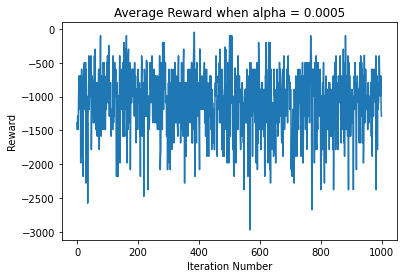

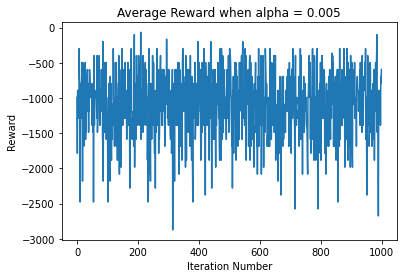

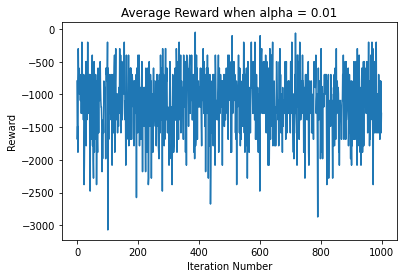

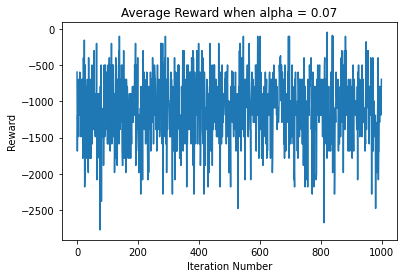

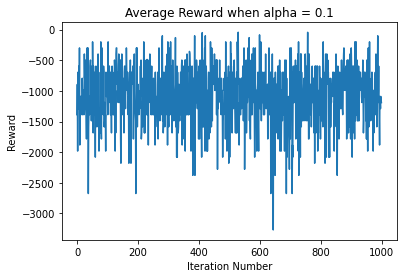

In [ ]:
for i in range(5):
  plot_reward(rewards[i], alpha[i])

Plotting Number of steps took for each alpha

Text(0, 0.5, 'Number of steps')

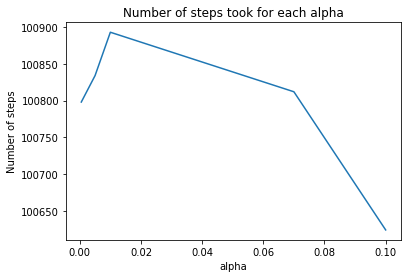

In [ ]:
plt.plot(alpha, num_steps)
plt.title("Number of steps took for each alpha")
plt.xlabel("alpha")
plt.ylabel("Number of steps")

Plotting how many times we reached terminal state in all episodes against alpha

Text(0, 0.5, 'Number of Terminations')

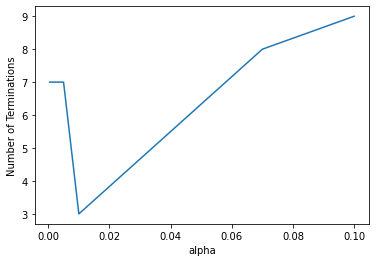

In [ ]:
plt.plot(alpha, numOfTerms)
plt.xlabel("alpha")
plt.ylabel("Number of Terminations")

Rendering the final policy

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[0],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[1],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[2],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[3],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[4],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

# Question 2

In [ ]:
# need to find avg q value for state - 36, 4, 19, 33
# Q learning with e-greedy policy
def qLearningGreedy(env, alpha, epsilon):
  num_states = env.observation_space.n
  num_actions = env.action_space.n
  gamma = 0.99

  Q = np.zeros((num_states, num_actions)) # Q(s,a)
  policy = np.zeros(num_states) # to store policy
  avg_reward = [] # average reward per episode used to draw the plot
  num_iterations = 0
  max_iterations = 1000
  total_steps = 0 # keeping tracks of how many steps taken so far

  qReqState = [0, 0, 0, 0]

  while(num_iterations < max_iterations): # limiting number of episodes
    curr_state = env.reset()[0]
    is_terminal = False
    temp_reward = 0
    steps = 0
    while(is_terminal == False):
      # e - greedy
      n = random.random()
      if(n <= epsilon):
        action = random.randint(0, 3) # taking a random action since all have same prob
      else:
        action = np.argmax(Q[curr_state])

      nextState, reward, isNextStateTerminal, trash1, trash2 = env.step(action)
      temp_reward += reward

      # getting max Q(s', a)
      nextStateQ = max(Q[nextState])

      # Q(s,a) = Q(s,a) + alpha*(r + gamma*(Q(s',a)) - Q(s,a))
      Q[curr_state][action] += alpha*(reward + gamma*(nextStateQ) - Q[curr_state][action])
      total_steps += 1
      curr_state = nextState
      is_terminal = isNextStateTerminal
      steps += 1

    # taking average reward for plotting the graph as required
    avg_reward.append(temp_reward)

    # getting the sum of Q values of the four states as required
    qReqState[0] += Q[36][0] + Q[36][1] + Q[36][2] + Q[36][3]
    qReqState[1] += Q[4][0] + Q[4][1] + Q[4][2] + Q[4][3]
    qReqState[2] += Q[19][0] + Q[19][1] + Q[19][2] + Q[19][3]
    qReqState[3] += Q[33][0] + Q[33][1] + Q[33][2] + Q[33][3]
    num_iterations += 1

  # getting the policy
  for i in range(num_states):
    policy[i] = np.argmax(Q[i])

  # taking the average of  Q values
  qReqState[0] = qReqState[0]/max_iterations
  qReqState[1] = qReqState[1]/max_iterations
  qReqState[2] = qReqState[2]/max_iterations
  qReqState[3] = qReqState[3]/max_iterations

  return policy, avg_reward, total_steps, qReqState, Q

Function for graph reward vs episode

In [ ]:
def plot_reward2(r, e):
  m = len(r)
  x = np.arange(m)
  plt.plot(x, r)
  plt.xlabel("Iteration Number")
  plt.ylabel("Reward")
  plt.title("Reward for iteration for epsilon = " + str(e))
  plt.show()

In [ ]:
alpha = 0.0001
e = [0.95, 0.76, 0.55, 0.25, 0.1]

policy = []
rewards = []
num_steps = []
qReqState = []
Q = []

env = gym.make('CliffWalking-v0',render_mode="None")
env.reset()

for i in range(5):
  pi, r, n, q, qsa = qLearningGreedy(env, alpha, e[i])
  policy.append(pi)
  rewards.append(r)
  num_steps.append(n)
  qReqState.append(q)
  Q.append(qsa)

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='None' that is not in the possible render_modes (['human', 'rgb_array', 'ansi']).
  logger.warn(


Plot for Reward

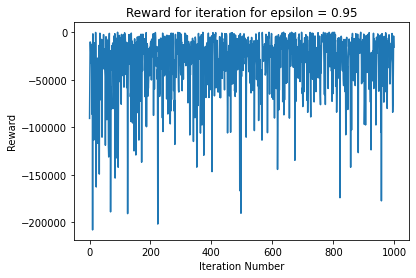

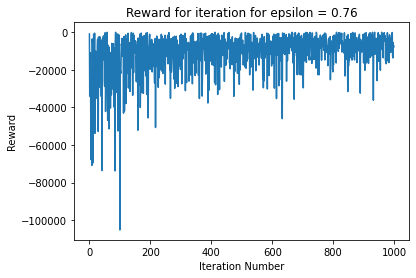

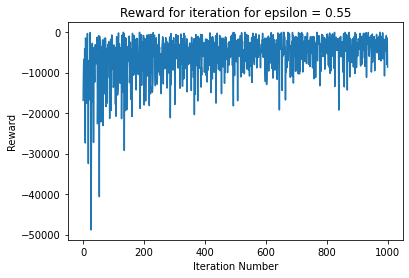

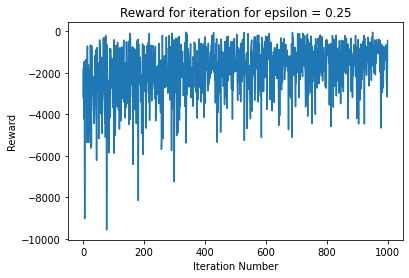

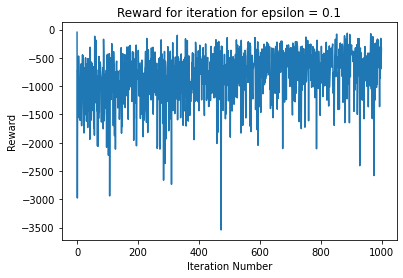

In [ ]:
for i in range(5):
  plot_reward2(rewards[i], e[i])

Graph of number of steps vs epsilon

Text(0, 0.5, 'Total number of steps over all episodes')

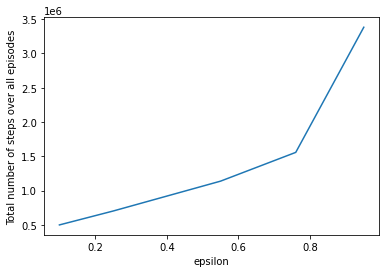

In [ ]:
plt.plot(e, num_steps)
plt.xlabel("epsilon")
plt.ylabel("Total number of steps over all episodes")

Plotting average Q values of the asked states for each epsilon

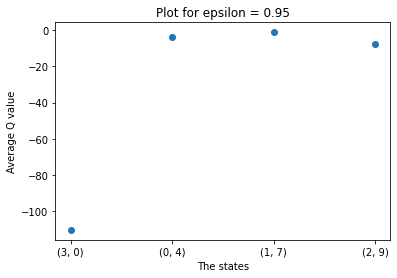

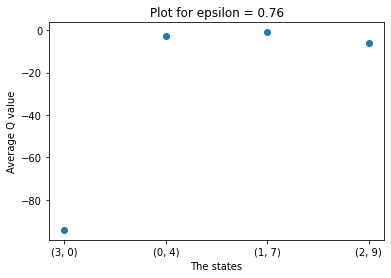

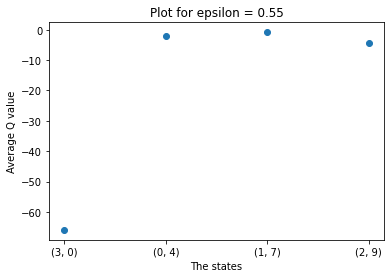

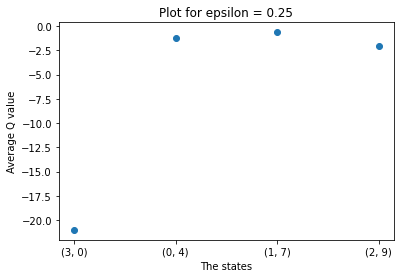

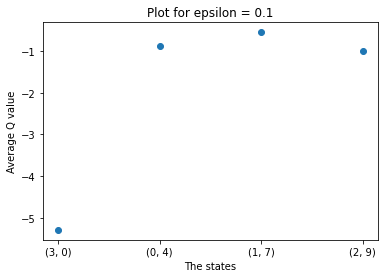

In [ ]:
x = ["(3, 0)", "(0, 4)", "(1, 7)", "(2, 9)"]

for i in range(len(qReqState)):
  plt.scatter(x, qReqState[i])
  plt.xlabel("The states")
  plt.ylabel("Average Q value")
  plt.title("Plot for epsilon = " + str(e[i]))
  plt.show()

Rendering the final policy learnt

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[0],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[1],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[2],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[3],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q1(Q[4],path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

#  Lunar Lander environment from OpenAI Gym.
https://www.gymlibrary.dev/environments/box2d/lunar_lander/

**Description**

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. In the assignment we will be dealing with **Discrete** task. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.


**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

    the lander crashes (the lander body gets in contact with the moon);

    the lander gets outside of the viewport (x coordinate is greater than 1);

    the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body:


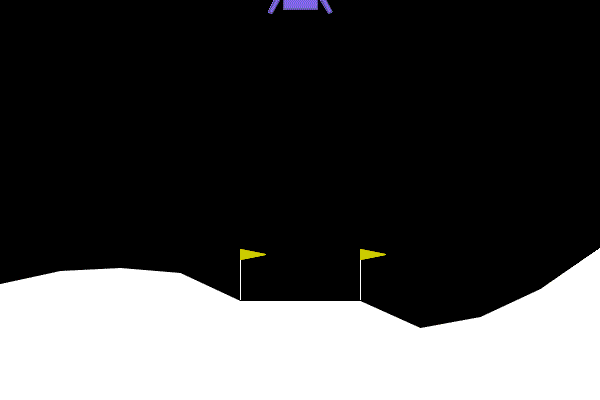

# Template code for running Lunar lander

In [ ]:
# env = gym.make("LunarLander-v2",render_mode="human")

In [ ]:
# env.reset()
# render()

In [ ]:
# env.action_space

Taking random actions, we have to supply 4 actions to the agent. They have to be clipped between -1.0  to  1.0

In [ ]:
# for i in range(100):
#   next_state, reward, done,_= env.step(np.random.randint(0,4))
#   render()

In [ ]:
# IMPORTANT
# note : i have taken this code for discretizing the states from https://github.com/rogerxcn/lunar_lander_project/blob/master/sarsa_agent.py
def state_extractor(s):
  s = list(s)
  state = (min(5, max(-5, int((s[0]) / 0.05))), \
            min(5, max(-1, int((s[1]) / 0.1))), \
            min(3, max(-3, int((s[2]) / 0.1))), \
            min(3, max(-3, int((s[3]) / 0.1))), \
            min(3, max(-3, int((s[4]) / 0.1))), \
            min(3, max(-3, int((s[5]) / 0.1))), \
            int(s[6]), \
            int(s[7]))
  state = tuple(state)
  return state

In [ ]:
def e_greedy(env, curr_state, Q, epsilon):
  n = np.random.random()

  if(n < epsilon):
    return random.randint(0,3)
  else:
    if curr_state in Q:
      return np.argmax(Q.get(curr_state))

  return 0 # not in q

In [ ]:
def plot_rewardSarsa(r):
  m = len(r)
  x = np.arange(m)
  plt.plot(x, r)

In [ ]:
def img_to_vid_Q2(Q,path):
  env = gym.make("LunarLander-v2",render_mode="human")
  curr_state = env.reset()[0]
  curr_state = tuple(curr_state)
  curr_state = state_extractor(curr_state)

  for i in range(1):
    img = []
    while True:
      action = np.argmax(Q.get(curr_state))
      next_state, r, temp, info, extra = env.step(action)
      img.append(render())

      state = next_state
      if(temp == True):
        break
    (img_to_video(img,path,4))

Sarsa

In [ ]:
# function for sarsa
def sarsa(env, alpha, epsilon):
  gamma = 0.99
  Q = {}
  avg_reward = []
  num_iterations = 0
  max_iterations = 100 # number of episodes

  while(num_iterations < max_iterations):
    curr_state = env.reset()[0]
    curr_state = tuple(curr_state)

    curr_state = state_extractor(curr_state) # discretization
    action = e_greedy(env, curr_state, Q, epsilon)
    is_terminal = False
    temp_reward = 0
    while(is_terminal == False):
      next_state, reward, isNextStateTerminal, extra1, extra2 = env.step(action)
      next_state = state_extractor(next_state)
      temp_reward += reward
      next_state = tuple(next_state)
      action_1 = e_greedy(env, next_state, Q, epsilon)

      if curr_state in Q:
        if next_state in Q:
          Q[curr_state][action] = Q[curr_state][action] + alpha*(reward + gamma*Q[next_state][action_1] - Q[curr_state][action]) # Q update eqn
        else:
          Q[curr_state][action] = Q[curr_state][action] + alpha*(reward - Q[curr_state][action]) # Q update eqn
      else:
        Q[curr_state] = np.zeros(4) # including that Q if not already in there

      is_terminal = isNextStateTerminal
      curr_state = next_state
      action = action_1

    avg_reward.append(temp_reward)
    num_iterations += 1

  return Q, avg_reward

In [ ]:
env = gym.make("LunarLander-v2", render_mode="none")

alpha = 0.01
epsilon = 0.1

rewards = []

q, r = sarsa(env, alpha, epsilon)

temp_reward = 0

for i in range(len(r)):
  temp_reward += r[i]
  rewards.append(temp_reward/(i + 1))

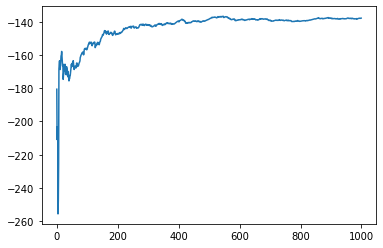

In [ ]:
plot_rewardSarsa(rewards)

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q2(q,path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

Expected Sarsa

In [ ]:
def expected_sarsa(env, alpha, epsilon):
  gamma = 0.99
  Q = {} # making a dictionary for Q(s,a)
  avg_reward = []
  num_iterations = 0
  max_iterations = 100 # number of episodes

  while(num_iterations < max_iterations):
    curr_state = env.reset()[0]
    curr_state = tuple(curr_state)

    curr_state = state_extractor(curr_state) # discretization
    action = e_greedy(env, curr_state, Q, epsilon)
    is_terminal = False
    temp_reward = 0
    while(is_terminal == False):
      next_state, reward, isNextStateTerminal, extra1, extra2 = env.step(action)
      next_state = state_extractor(next_state)
      temp_reward += reward
      action_1 = e_greedy(env, next_state, Q, epsilon)

      temp = 0

      if curr_state in Q: # update eqns
        if next_state in Q:
          for i in range(len(Q[next_state])):
            if(i == action_1):
              temp += (1 - epsilon)*Q[next_state][action]
            else:
              temp += epsilon*Q[next_state][action]
          Q[curr_state][action] = Q[curr_state][action] + alpha*(reward + gamma*temp - Q[curr_state][action]) # Q update eqn
        else:
          Q[curr_state][action] = Q[curr_state][action] + alpha*(reward - Q[curr_state][action]) # Q update eqn
      else:
        Q[curr_state] = np.zeros(4) # including that Q if not already in there

      is_terminal = isNextStateTerminal
      curr_state = next_state
      action = action_1

    avg_reward.append(temp_reward)
    num_iterations += 1

  return Q, avg_reward

In [ ]:
env = gym.make("LunarLander-v2", render_mode="none")

alpha = 0.01
epsilon = 0.1

rewards = []

q, r = expected_sarsa(env, alpha, epsilon)

temp_reward = 0

for i in range(len(r)):
  temp_reward += r[i]
  rewards.append(temp_reward/(i + 1))

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


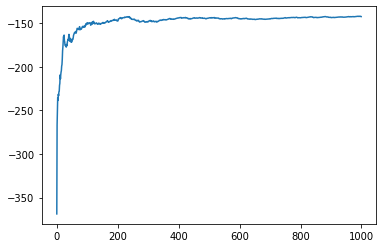

In [ ]:
plot_rewardSarsa(rewards)

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q2(q,path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

Comparison of sarsa and expected sarsa for different alpha and epsilon

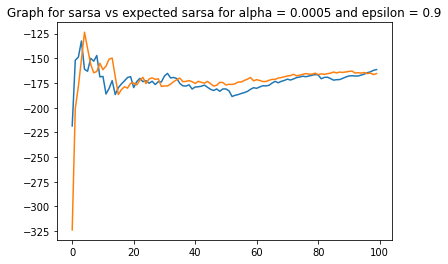

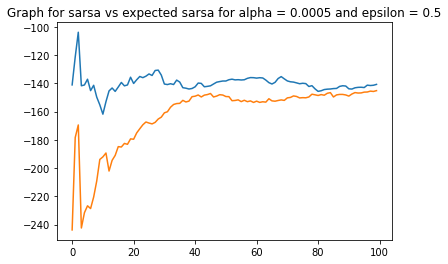

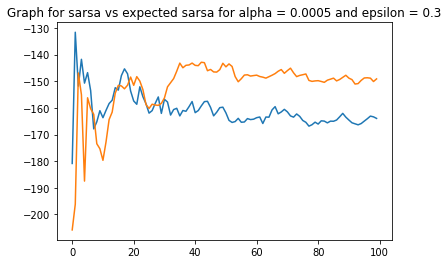

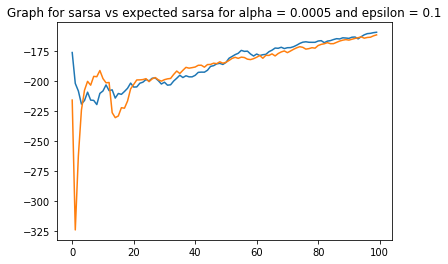

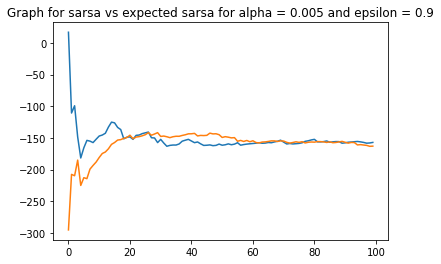

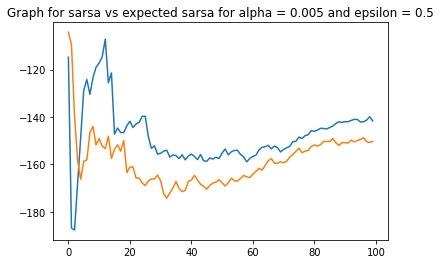

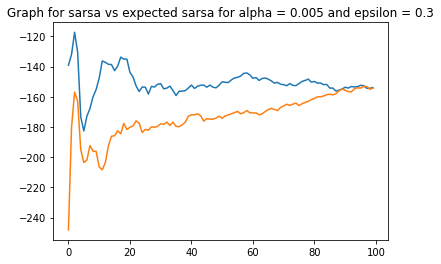

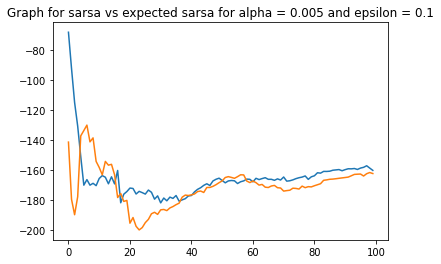

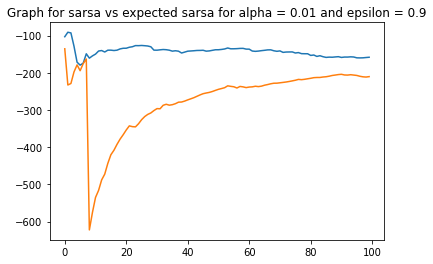

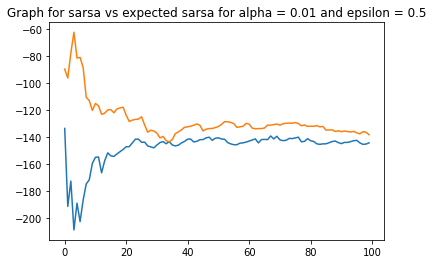

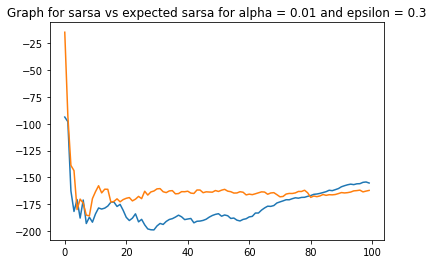

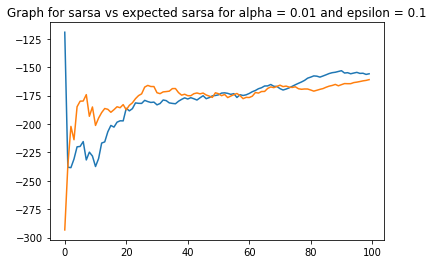

KeyboardInterrupt: ignored

In [ ]:
env = gym.make("LunarLander-v2", render_mode="none")
alpha = [0.0005,0.005,0.01,0.1]
epsilon = [0.9, 0.5, 0.3, 0.1]

Q_expected = {}
Q_sarsa = {}

for i in range(len(alpha)):
  for j in range(len(epsilon)):
    Qs, rs = sarsa(env, alpha[i], epsilon[j])
    Qe, re = expected_sarsa(env, alpha[i], epsilon[j])

    Q_expected[tuple((i,j))] = Qe
    Q_sarsa[tuple((i,j))] = Qs

    reward_sarsa = []
    reward_expected = []

    temp = 0
    for k in range(len(rs)):
      temp += rs[k]
      reward_sarsa.append((temp)/(k+1))

    temp = 0
    for k in range(len(re)):
      temp += re[k]
      reward_expected.append((temp)/(k + 1))

    m = len(reward_sarsa)
    x = np.arange(m)
    plt.plot(x, reward_sarsa)
    plt.plot(x, reward_expected)
    plt.title("Graph for sarsa vs expected sarsa for alpha = " + str(alpha[i]) + " and epsilon = " + str(epsilon[j]))
    plt.show()

Values of alpha and epsilon for which best results

In [ ]:
# From the graphs we can conclude that best results we are getting for alpha = 0.0005 and e = 0.1

alpha_max = 0.0005
epsilon_max = 0.1

Sarsa Lamda function

In [ ]:
def sarsa_lambda(env, alpha, lamda, epsilon):
  gamma = 0.99
  Q = {}
  e = {}
  delta = 0
  rewards = []
  num_iterations = 0
  max_iterations = 100

  while(num_iterations < max_iterations):
    curr_state = env.reset()[0]
    curr_state = tuple(curr_state)
    curr_state = state_extractor(curr_state)
    action = e_greedy(env, curr_state, Q, epsilon)
    temp_reward = 0
    is_terminal = False
    while(is_terminal == False):
      next_state, r, isNextStateTerminal, trash1, trash2 = env.step(action)
      temp_reward += r
      next_state = tuple(next_state)
      next_state = state_extractor(next_state)
      action1 = e_greedy(env, curr_state, Q, epsilon)

      if Q.get(curr_state) is not None and Q.get(next_state) is not None:
        delta = r + gamma*Q[next_state][action1] - Q[curr_state][action]
      elif Q.get(curr_state) is not None:
        delta = r - Q[curr_state][action]
      elif Q.get(next_state) is not None:
        delta = r + gamma*Q[next_state][action1]
      else:
        delta = r

      if e.get(curr_state) is not None:
        e[curr_state][action] += 1
      else:
        e[curr_state] = np.zeros(4)
        e[curr_state][action] = 1

      Q[curr_state] = np.zeros(4)
      Q[next_state] = np.zeros(4)

      for state in Q:
        for a in Q[state]:
          a = int(a)
          if e.get(state) is not None:
            Q[state][a] += alpha*delta*e[state][a]
          else:
            e[state] = np.zeros(4)
          e[state][a] = gamma*lamda*e[state][a]

      curr_state = next_state
      is_terminal = isNextStateTerminal

    rewards.append(temp_reward)
    num_iterations += 1

  return Q, rewards

Comparison of sarsa lamda with base sarsa

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


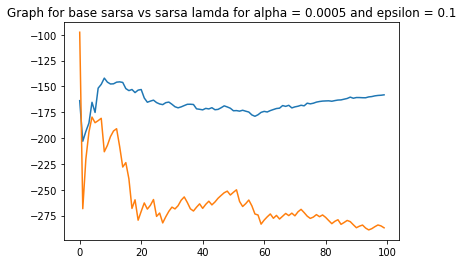

In [ ]:
env = gym.make("LunarLander-v2", render_mode="none")

Q_lambda, reward_lambda = sarsa_lambda(env, alpha_max, 0.5, epsilon_max)
Q_s, reward_s = sarsa(env, alpha_max, epsilon_max)

reward_base = []
reward_lamda = []

temp = 0
for k in range(len(reward_s)):
  temp += reward_s[k]
  reward_base.append((temp)/(k+1))

temp = 0
for k in range(len(reward_lambda)):
  temp += reward_lambda[k]
  reward_lamda.append((temp)/(k + 1))

m = len(reward_lamda)
x = np.arange(m)
plt.plot(x, reward_base)
plt.plot(x, reward_lamda)
plt.title("Graph for base sarsa vs sarsa lamda for alpha = " + str(alpha_max) + " and epsilon = " + str(epsilon_max))
plt.show()

Video for best alpha and epsilon for base sarsa

In [ ]:
# sarsa lamda

path = './cwq2.mp4'
img_to_vid_Q2(Q_lambda,path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
path = './cwq2.mp4'
img_to_vid_Q2(Q_s,path)
video = imageio.mimread(path)  #Loading video
#video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

## Important Note:

## The video render function and discretization function have been taken from the internet

## The functions have been run at very low number of iterations as the runtime was getting too large

# Questions [Total 100 points]


## ***On Cliff-Walking***

Q1. Implement a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0005,0.005,0.01,0.07,0.1].  In each case, report the effect of $\alpha$ on Q-learning and demonstrate using plots. Plot the learning curve of the policies learnt in each case using  episode vs. avg reward/episode  **(20 points)**

Q2. Implement Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.95, 0.76, 0.55, 0.25, 0.1]. What is the effect of $\epsilon$ on the performance of Q-Learning?  Support your arguments with valuable statistics and graphs. You should create a graph of Epsilon with Average Q-values for start State(3,0) ,state(0,4) , state (1,7) and state(2,9). See the image included below. **(20 points)**

Q3. What is the relationship/similarities between Purely Random policy and $ϵ$- greedy policy? Comment on the performance difference among these policies. Is Random Policy a special case of  $ϵ$-Greedy policy?  **(5 point)**

Q4.  Implement Q-Learning using the $\epsilon-$Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plot the learning curve of the policy being learnt using episode vs. avg reward/episode. **(10 points)**

***Note In all the above questions, render the cliff walking with the final learnt policy ***


States whose values to be plotted for Q2

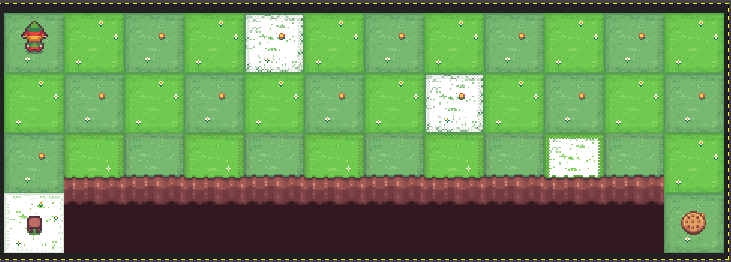



---



## ***On Lunar Lander (Box 2D)***

Q1. Consider $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implement SARSA and Expected SARSA. Plot the graphs for:  episode vs. max-time step and episode vs. average-reward in each case. State your observations. Render 3 videos for the initial, mid and final stages of the learning process for both the methods. **(20 points).**

Q2. Experiment with different $\alpha$ = [0.0005,0.005,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discuss how changing $\alpha$ and $\epsilon$ affect the agent’s learning performance. Include graphs to help with your explanation. Also comment on best combination along with rendering its video. **(15 points).**


Q3. Implement SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous question Q2. Compare the performance of SARSA($\lambda$) with that of plain SARSA algorithm. **(10 points).**